# ML_Vision_Final Project : Captcha Solver

# POUYA AHADI 400123014 pa@ieee.org 

# First Phase: Collecting raw data

In [60]:
import selenium
import matplotlib as plt
import cv2
import time

In [61]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [62]:
driver = webdriver.Firefox()

In [67]:
url = 'https://evisaforms.state.gov/default.asp?CSRFToken=AD5C64C0EA5B47B791ED038343EC850B&PostCode=ERB&CountryCode=IRAQ++++++&CountryCodeShow=&PostCodeShow=&Submit=Submit'

In [89]:
driver.get(url)

In [90]:
for i in range (901,1001):
    captcha_element = driver.find_element(By.ID,'frmconinput_CaptchaImage')
    captcha_element.screenshot('number'+str(i)+'.jpg')
    refreshed_element = driver.find_element(By.ID,'frmconinput_ReloadIcon')
    refreshed_element.click()
    time.sleep(2)

In [21]:
#captcha_element.screenshot('number_1.jpg')

True

In [22]:
#refreshed_element = driver.find_element(By.ID,'frmconinput_ReloadIcon')

In [23]:
#time.sleep(3)
#refreshed_element.click()

# Second Phase: Preprocessing

In [99]:
import os
import cv2
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/pouyaahadi/Desktop/فایل های ارشد/ML - AUT/Vision'

In [63]:
os.listdir()

['T8SN4.jpg',
 'VB964.jpg',
 'Y56BU.jpg',
 'N9BUE.jpg',
 'MSNR9.jpg',
 'N54DR.jpg',
 'B58JM.jpg',
 'M5WR8.jpg',
 '9V6BV.jpg',
 'WSD4W.jpg',
 'PMUUM.jpg',
 'HMTD9.jpg',
 'P3B9K.jpg',
 'MTT9K.jpg',
 'Y8WB8.jpg',
 '8KWPH.jpg',
 'KK34K.jpg',
 'PCEJA.jpg',
 'VMBDS.jpg',
 'BDAXA.jpg',
 'JWA4P.jpg',
 'T69Y6.jpg',
 '9DHV3.jpg',
 'D69ND.jpg',
 'NUCAT.jpg',
 'AH4D3.jpg',
 'CVXHJ.jpg',
 'NSWM8.jpg',
 'MCBMS.jpg',
 'AR9WM.jpg',
 'S44CY.jpg',
 '8D383.jpg',
 'RTNYC.jpg',
 'AKC6Y.jpg',
 '3JSEB.jpg',
 '5PH8K.jpg',
 '4RWXR.jpg',
 'SUUHP.jpg',
 '84P3C.jpg',
 'NH3HN.jpg',
 'WRVNS.jpg',
 'TYXHB.jpg',
 'XAV3B.jpg',
 '8SXWC.jpg',
 'BBTK9.jpg',
 'VNJ9V.jpg',
 '6WYHY.jpg',
 'VCX8S.jpg',
 'BCEA9.jpg',
 'HESH9.jpg',
 'BA3JS.jpg',
 'TenthSplitted',
 '94YMC.jpg',
 'PXC8E.jpg',
 'PJD85.jpg',
 'VR4W3.jpg',
 'TMYB6.jpg',
 'ET4VM.jpg',
 '6T5U4.jpg',
 'YNPUS.jpg',
 'PAEEH.jpg',
 'YCPDE.jpg',
 'A4TPA.jpg',
 'XTX44.jpg',
 'WBN9B.jpg',
 'YPH6W.jpg',
 'WTEDM.jpg',
 '5DPRC.jpg',
 '8KA4D.jpg',
 '3BH4P.jpg',
 '9EC54.jpg',
 '

Y
5
6
B
U
Y56BU.jpg
N
9
B
U
E
N9BUE.jpg
M
S
N
R
9
MSNR9.jpg
N
5
4
D
R
N54DR.jpg
B
5
8
J
M
B58JM.jpg
M
5
W
R
8
M5WR8.jpg
9
V
6
B
V
9V6BV.jpg
W
S
D
4
W
WSD4W.jpg
P
M
U
U
M
PMUUM.jpg
H
M
T
D
9
HMTD9.jpg
P
3
B
9
K
P3B9K.jpg
M
T
T
9
K
MTT9K.jpg
Y
8
W
B
8
Y8WB8.jpg
8
K
W
P
H
8KWPH.jpg
K
K
3
4
K
KK34K.jpg
P
C
E
J
A
PCEJA.jpg
V
M
B
D
S
VMBDS.jpg
B
D
A
X
A
BDAXA.jpg
J
W
A
4
P
JWA4P.jpg
T
6
9
Y
6
T69Y6.jpg
9
D
H
V
3
9DHV3.jpg
D
6
9
N
D
D69ND.jpg
N
U
C
A
T
NUCAT.jpg
A
H
4
D
3
AH4D3.jpg
C
V
X
H
J
CVXHJ.jpg
N
S
W
M
8
NSWM8.jpg
M
C
B
M
S
MCBMS.jpg
A
R
9
W
M
AR9WM.jpg
S
4
4
C
Y
S44CY.jpg
8
D
3
8
3
8D383.jpg
R
T
N
Y
C
RTNYC.jpg
A
K
C
6
Y
AKC6Y.jpg
3
J
S
E
B
3JSEB.jpg
5
P
H
8
K
5PH8K.jpg
4
R
W
X
R
4RWXR.jpg
S
U
U
H
P
SUUHP.jpg
8
4
P
3
C
84P3C.jpg
N
H
3
H
N
NH3HN.jpg
W
R
V
N
S
WRVNS.jpg
T
Y
X
H
B
TYXHB.jpg
X
A
V
3
B
XAV3B.jpg
8
S
X
W
C
8SXWC.jpg
B
B
T
K
9
BBTK9.jpg
V
N
J
9
V
VNJ9V.jpg
6
W
Y
H
Y
6WYHY.jpg
V
C
X
8
S
VCX8S.jpg
B
C
E
A
9
BCEA9.jpg
H
E
S
H
9
HESH9.jpg
B
A
3
J
S
BA3JS.jpg
9
4
Y
M
C
94YMC.jpg


N
5
6
5
4
N5654.jpg
5
K
8
P
Y
5K8PY.jpg
D
A
S
K
N
DASKN.jpg
V
A
5
A
P
VA5AP.jpg
D
W
M
M
Y
DWMMY.jpg
X
E
T
3
T
XET3T.jpg
R
P
S
U
E
RPSUE.jpg
U
M
R
Y
5
UMRY5.jpg
B
6
M
H
E
B6MHE.jpg
4
X
J
Y
V
4XJYV.jpg
V
Y
X
R
N
VYXRN.jpg
N
M
M
3
3
NMM33.jpg
E
V
D
6
J
EVD6J.jpg
N
C
S
8
5
NCS85.jpg
T
9
D
B
U
T9DBU.jpg
8
W
P
6
P
8WP6P.jpg
D
A
N
E
C
DANEC.jpg
N
N
V
V
N
NNVVN.jpg
B
M
3
4
X
BM34X.jpg
V
N
9
E
9
VN9E9.jpg
B
H
B
M
D
BHBMD.jpg
V
A
S
4
Y
VAS4Y.jpg
V
B
V
4
P
VBV4P.jpg
S
P
9
C
4
SP9C4.jpg
4
U
H
E
E
4UHEE.jpg
Y
8
K
9
Y
Y8K9Y.jpg
M
M
U
S
M
MMUSM.jpg
H
4
V
T
M
H4VTM.jpg
T
4
C
4
K
T4C4K.jpg
4
E
5
V
U
4E5VU.jpg
R
Y
Y
Y
W
RYYYW.jpg
Y
M
6
C
U
YM6CU.jpg
C
6
N
X
N
C6NXN.jpg
E
B
K
K
R
EBKKR.jpg
S
U
H
8
6
SUH86.jpg
5
Y
P
5
S
5YP5S.jpg
6
Y
X
D
N
6YXDN.jpg
R
3
H
A
Y
R3HAY.jpg
X
D
M
U
U
XDMUU.jpg
K
6
J
W
5
K6JW5.jpg
5
X
C
3
3
5XC33.jpg
3
C
S
6
5
3CS65.jpg
R
J
D
C
6
RJDC6.jpg
X
V
H
B
9
XVHB9.jpg
S
S
A
N
9
SSAN9.jpg
P
H
E
Y
Y
PHEYY.jpg
R
A
3
M
K
RA3MK.jpg
S
A
3
W
6
SA3W6.jpg
K
P
E
R
T
KPERT.jpg
C
M
U
9
N
CMU9N.jpg


9
4
A
UH94A.jpg
8
Y
K
P
S
8YKPS.jpg
M
3
U
U
5
M3UU5.jpg
B
5
5
A
M
B55AM.jpg
K
J
Y
3
U
KJY3U.jpg
K
8
M
6
5
K8M65.jpg
S
C
3
J
4
SC3J4.jpg
P
D
9
Y
A
PD9YA.jpg
H
X
T
U
E
HXTUE.jpg
R
8
B
H
8
R8BH8.jpg
V
Y
X
C
K
VYXCK.jpg
H
W
N
Y
K
HWNYK.jpg
H
H
P
H
X
HHPHX.jpg
3
4
X
Y
9
34XY9.jpg
M
T
A
A
5
MTAA5.jpg
8
T
W
K
A
8TWKA.jpg
T
R
8
P
T
TR8PT.jpg
E
H
Y
M
V
EHYMV.jpg
6
3
P
N
K
63PNK.jpg
A
H
3
Y
T
AH3YT.jpg
5
A
5
M
R
5A5MR.jpg
5
9
T
A
V
59TAV.jpg
U
V
V
5
X
UVV5X.jpg
R
3
H
J
3
R3HJ3.jpg
C
6
E
U
Y
C6EUY.jpg
E
Y
Y
8
P
EYY8P.jpg
A
A
H
M
Y
AAHMY.jpg
X
W
B
9
W
XWB9W.jpg
4
P
D
5
Y
4PD5Y.jpg
K
W
Y
K
B
KWYKB.jpg
J
T
N
A
D
JTNAD.jpg
E
P
8
D
K
EP8DK.jpg
C
5
J
6
J
C5J6J.jpg
T
Y
6
D
W
TY6DW.jpg
T
P
C
S
8
TPCS8.jpg
3
P
H
H
K
3PHHK.jpg
3
W
M
4
B
3WM4B.jpg
D
8
H
6
H
D8H6H.jpg
D
6
C
S
W
D6CSW.jpg
D
C
N
Y
R
DCNYR.jpg
6
P
K
C
5
6PKC5.jpg
V
R
3
R
3
VR3R3.jpg
J
E
5
X
9
JE5X9.jpg
V
W
P
B
B
VWPBB.jpg
8
5
V
N
T
85VNT.jpg
V
N
H
A
A
VNHAA.jpg
4
5
S
E
Y
45SEY.jpg
E
3
U
Y
T
E3UYT.jpg
5
B
A
9
H
5BA9H.jpg
N
P
T
W
A
NPTWA.jpg
W
X


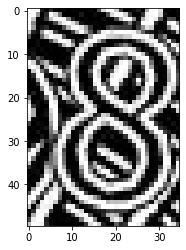

In [64]:
counter = 0

for filename in os.listdir('//Users//pouyaahadi//Desktop//فایل های ارشد/ML - AUT//Vision')[2:]:
    if filename.endswith('.jpg'):
        image = cv2.imread(f'//Users//pouyaahadi//Desktop//فایل های ارشد/ML - AUT//Vision//{filename}',0)
        for i in range(5):
            counter = counter + 1
            sub_image = image[:, i*28:(i*28+35)]
            print(filename[i])
            plt.imshow(sub_image, cmap='gray')
            cv2.imwrite(f'//Users//pouyaahadi//Desktop//فایل های ارشد/ML - AUT//Vision//TotalSplitted//{filename[i]}_{counter}.jpg',sub_image)
            
        print(filename)
        

# Third Phase: Filtering

In [11]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
import PIL
from PIL import ImageEnhance

In [3]:
os.getcwd()

'/Users/pouyaahadi/Desktop/فایل های ارشد/ML - AUT/Vision'

In [4]:
os.listdir()

['E_1785.jpg',
 'E_1747.jpg',
 'E_1750.jpg',
 '.DS_Store',
 'S_1715.jpg',
 'S_1702.jpg',
 'E_1805.jpg',
 'S_1689.jpg',
 'B_1812.jpg',
 'B_1804.jpg',
 'Crude Data 1000',
 'AllofSplittedLabeledDataGatheredsofar',
 'B_1802.jpg',
 'Vision_CaptchaSolver_PouyaAhadi.ipynb',
 'B_1761.jpg',
 'B_1762.jpg',
 'B_1788.jpg',
 'B_1765.jpg',
 'B_1759.jpg',
 '.ipynb_checkpoints',
 'E_1808.jpg',
 'E_1773.jpg',
 'S_1685.jpg',
 'filterexample',
 'S_1724.jpg',
 'E_1758.jpg',
 'S_1692.jpg',
 'S_1708.jpg',
 'S_1697.jpg',
 'AllofSplittedLabeledDataGatheredsofar_copy']

# Reading an example image

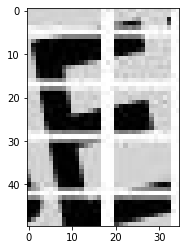

In [171]:
example = plt.imread('E_1773.jpg')
plt.imshow(example,cmap='gray')

# Bilateral filter output

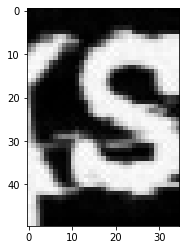

In [6]:
bilateral = cv2.bilateralFilter(example,1,150,150)
plt.imshow(bilateral,cmap='gray')

# Skimage Canny

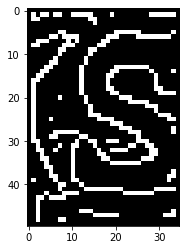

In [7]:
edges5 = skimage.feature.canny(image=example, sigma=1, low_threshold=0, high_threshold=1,)
plt.imshow(edges5,cmap='gray')

# GaussianBlur

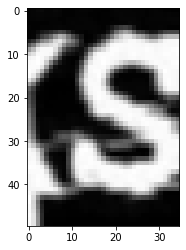

In [8]:
gb = cv2.GaussianBlur(example, (3,3), 1,1)
plt.imshow(gb,cmap='gray')


# Pillow

In [19]:
img = PIL.Image.open('S_1724.jpg')
converter = ImageEnhance.Brightness(img)
#plt.imshow(converter,cmap='gray')

# MedianBlur 

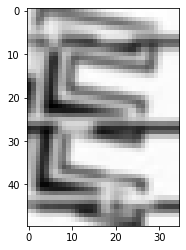

In [36]:
median = cv2.medianBlur(gb,1)
plt.imshow(median,cmap='gray')


# Blur

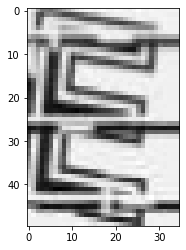

In [19]:
filtered = cv2.blur(example,(1,1))
filtered = cv2.blur(filtered,(1,1))
plt.imshow(filtered,cmap='gray')

# Sobel and Absolute!

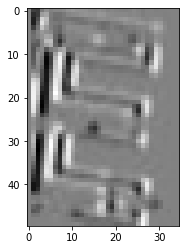

In [6]:
sobelx = cv2.Sobel(example,cv2.CV_16S,1,0,ksize=-1)
sobelx_16S = np.absolute(sobelx)
sobelx_8U = np.uint8(sobelx_16S)
plt.imshow(sobelx, cmap='gray')

# Canny

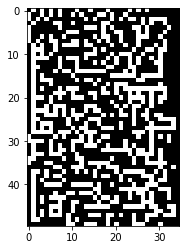

In [7]:
fcan = cv2.Canny(sobelx_8U,100,100)
plt.imshow(fcan,cmap='gray')

# Double MedianBlur

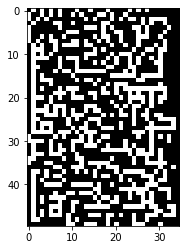

In [8]:
fblur = cv2.medianBlur(fcan,1)
fblur = cv2.medianBlur(fblur,1)

plt.imshow(fblur,cmap='gray')

# Laplacian filter

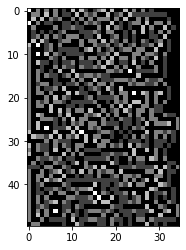

In [9]:
flap = cv2.Laplacian(fblur,10)
plt.imshow(flap,cmap='gray')

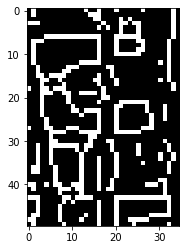

In [173]:
example = plt.imread('E_1773.jpg')

firstfilter = cv2.fastNlMeansDenoising(example, None,33,8,41)
secondfilter = cv2.bilateralFilter(firstfilter, 1,3,3)
thirdfilter = cv2.medianBlur(secondfilter,3)
fourthfilter = cv2.GaussianBlur(thirdfilter, (1,3), 3,3)
fifthfilter = cv2.Canny(fourthfilter,1,1)

plt.imshow(fifthfilter,cmap='gray')

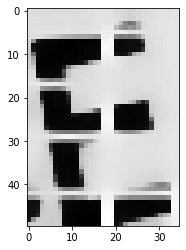

In [172]:
example = plt.imread('E_1773.jpg')

firstfilter = cv2.fastNlMeansDenoising(example, None,31,7,41)
secondfilter = cv2.bilateralFilter(firstfilter, 9,50,100)
thirdfilter = cv2.medianBlur(secondfilter,1)

plt.imshow(thirdfilter,cmap='gray')

# Final desicion: How to cascade filters to get the most crystal clear output?

In [175]:
os.getcwd()

'/Users/pouyaahadi/Desktop/فایل های ارشد/ML - AUT/Vision'

In [176]:
for filename in os.listdir('//Users//pouyaahadi//Desktop//فایل های ارشد/ML - AUT//Vision//AllofSplittedLabeledDataGatheredsofar_copy'):
    if filename.endswith('.jpg'):
        example = cv2.imread(f'//Users//pouyaahadi//Desktop//فایل های ارشد/ML - AUT//Vision//AllofSplittedLabeledDataGatheredsofar_copy//{filename}',0)
        firstfilter = cv2.fastNlMeansDenoising(example, None,31,7,41)
        secondfilter = cv2.bilateralFilter(firstfilter, 9,50,100)
        thirdfilter = cv2.medianBlur(secondfilter,1)
        cv2.imwrite(f'//Users//pouyaahadi//Desktop//فایل های ارشد/ML - AUT//Vision//Filtered//{filename}',thirdfilter)


# Fourth Phase: Training a CNN

# Check VISION_Part2_Pouya_Ahadi_400123014.ipynb out! :D